In [26]:
from astropy.table import setdiff, Table, unique, join
import astroquery
from astroquery.gaia import Gaia
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import lsdb
import healpy as hp


pd.set_option('display.max_columns', None)

astroquery.__version__

'0.4.7'

In [4]:
lsdb.__version__

'0.4.2'

In [3]:
Gaia.login()

INFO: Login to gaia TAP server [astroquery.gaia.core]


User:  lpalaver
Password:  ········


INFO: OK [astroquery.utils.tap.core]
INFO: Login to gaia data server [astroquery.gaia.core]
INFO: OK [astroquery.utils.tap.core]


See [data page](http://faculty.washington.edu/ivezic/sdss/catalogs/stripe82.html) for detailed info on the file content.

In [7]:
tha21 = lsdb.read_hats("/mnt/beegfs/scratch/data/S82_standards/S82_hats/S82_hats_fixed/")
tha21 = pd.DataFrame(tha21.compute().to_records())
tha21['CALIBSTARS'] = tha21['CALIBSTARS'].str.strip('CALIBSTARS_').astype('int')
tha21

,_healpix_29,CALIBSTARS,ra,dec,RArms,Decrms,Ntot,Ar,uNobs,umag,ummu,uErr,umrms,umchi2,gNobs,gmag,gmmu,gErr,gmrms,gmchi2,rNobs,rmag,rmmu,rErr,rmrms,rmchi2,iNobs,imag,immu,iErr,imrms,imchi2,zNobs,zmag,zmmu,zErr,zmrms,zmchi2,Norder,Dir,Npix,Mr,FeH,MrEst,MrEstUnc,FeHEst,ug,gr,gi,ri,iz,ugErr,grErr,giErr,riErr,izErr,glon,glat
0,178820370416688,891163,43.787097,1.037784,0.0282,0.0282,24,0.256,23,19.544,19.547,0.007,0.044,1.034,22,17.958,17.958,0.004,0.015,0.710,21,17.287,17.288,0.003,0.004,0.302,22,17.024,17.027,0.003,0.014,0.949,23,16.886,16.891,0.004,0.017,0.835,4,0,0,-99,-99,-99,-99,-99,1.586,0.671,0.934,0.263,0.138,0.008062,0.005000,0.005000,0.004243,0.005000,174.537601,-49.030895
1,178775253286992,891187,43.828101,1.040223,0.4066,0.4066,47,0.253,24,18.470,18.469,0.005,0.028,1.098,24,17.380,17.378,0.004,0.019,1.014,23,16.973,16.973,0.003,0.013,0.944,23,16.812,16.810,0.003,0.009,0.627,24,16.748,16.750,0.004,0.011,0.611,4,0,0,-99,-99,-99,-99,-99,1.090,0.407,0.568,0.161,0.064,0.006403,0.005000,0.005000,0.004243,0.005000,174.579778,-49.000538
2,178692611270558,891200,43.831573,1.024147,0.0315,0.0315,25,0.254,8,22.873,22.887,0.136,0.150,0.342,24,20.266,20.267,0.006,0.022,0.760,23,18.816,18.814,0.004,0.009,0.450,25,18.018,18.023,0.003,0.015,0.829,25,17.567,17.566,0.005,0.018,0.706,4,0,0,-99,-99,-99,-99,-99,2.607,1.450,2.248,0.798,0.451,0.136132,0.007211,0.006708,0.005000,0.005831,174.600676,-49.009624
3,178139752091901,891206,43.870259,0.983584,0.0259,0.0259,25,0.253,25,21.136,21.113,0.019,0.090,0.760,25,19.771,19.775,0.005,0.019,0.586,25,19.245,19.242,0.004,0.016,0.742,25,19.030,19.033,0.004,0.017,0.784,24,18.919,18.924,0.010,0.036,0.787,4,0,0,-99,-99,-99,-99,-99,1.365,0.526,0.741,0.215,0.111,0.019647,0.006403,0.006403,0.005657,0.010770,174.686073,-49.011621
4,178442591206321,891209,43.884348,1.028387,0.0506,0.0506,25,0.251,25,19.421,19.411,0.007,0.036,1.130,25,17.740,17.738,0.004,0.021,0.949,25,17.089,17.090,0.003,0.011,0.764,24,16.850,16.848,0.003,0.016,1.029,23,16.731,16.730,0.004,0.014,0.744,4,0,0,-99,-99,-99,-99,-99,1.681,0.651,0.890,0.239,0.119,0.008062,0.005000,0.005000,0.004243,0.005000,174.653707,-48.969732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952395,3458587837391950679,218913,316.124689,-0.984808,0.0322,0.0322,16,0.175,12,21.903,21.876,0.058,0.182,0.693,14,21.165,21.165,0.013,0.032,0.688,15,20.899,20.895,0.013,0.036,0.570,16,20.793,20.768,0.017,0.051,0.701,10,20.744,20.665,0.066,0.158,0.791,4,0,3071,-99,-99,-99,-99,-99,0.738,0.266,0.372,0.106,0.049,0.059439,0.018385,0.021401,0.021401,0.068154,48.618385,-29.731558
952396,3458588330308145677,218915,316.057052,-0.958560,0.0349,0.0349,15,0.185,9,22.975,22.955,0.138,0.163,0.371,15,21.535,21.545,0.017,0.071,0.908,14,21.020,21.002,0.015,0.055,1.019,15,20.820,20.774,0.017,0.068,1.157,13,20.602,20.582,0.054,0.096,0.502,4,0,3071,-99,-99,-99,-99,-99,1.440,0.515,0.715,0.200,0.218,0.139043,0.022672,0.024042,0.022672,0.056613,48.604161,-29.660076
952397,3458587856950236370,218917,316.133306,-0.971373,0.0410,0.0410,16,0.174,3,24.789,24.878,0.611,0.090,0.095,13,22.356,22.341,0.034,0.075,0.577,16,21.081,21.081,0.015,0.061,0.923,16,20.525,20.510,0.013,0.057,1.156,13,20.048,20.061,0.034,0.200,1.482,4,0,3071,-99,-99,-99,-99,-99,2.433,1.275,1.831,0.556,0.477,0.611945,0.037162,0.036401,0.019849,0.036401,48.636757,-29.732016
952398,3458585732920967238,218918,316.174186,-1.044566,0.0474,0.0474,26,0.177,7,22.501,22.493,0.110,0.065,0.192,21,21.422,21.401,0.013,0.086,1.437,20,20.976,20.959,0.011,0.065,1.140,21,20.750,20.741,0.014,0.067,0.846,19,20.744,20.697,0.047,0.119,0.617,4,0,3071,-99,-99,-99,-99,-99,1.079,0.446,0.672,0.226,0.006,0.110766,0.017029,0.019105,0.017804,0.049041,48.588761,-29.804763


In [217]:
tha21[tha21["CALIBSTARS"]=="737943"]

,_healpix_29,CALIBSTARS,ra,dec,RArms,Decrms,Ntot,Ar,uNobs,umag,ummu,uErr,umrms,umchi2,gNobs,gmag,gmmu,gErr,gmrms,gmchi2,rNobs,rmag,rmmu,rErr,rmrms,rmchi2,iNobs,imag,immu,iErr,imrms,imchi2,zNobs,zmag,zmmu,zErr,zmrms,zmchi2,Norder,Dir,Npix,Mr,FeH,MrEst,MrEstUnc,FeHEst,ug,gr,gi,ri,iz,ugErr,grErr,giErr,riErr,izErr,glon,glat


In [89]:
tha21.columns

Index(['_healpix_29', 'CALIBSTARS', 'ra', 'dec', 'RArms', 'Decrms', 'Ntot',
       'Ar', 'uNobs', 'umag', 'ummu', 'uErr', 'umrms', 'umchi2', 'gNobs',
       'gmag', 'gmmu', 'gErr', 'gmrms', 'gmchi2', 'rNobs', 'rmag', 'rmmu',
       'rErr', 'rmrms', 'rmchi2', 'iNobs', 'imag', 'immu', 'iErr', 'imrms',
       'imchi2', 'zNobs', 'zmag', 'zmmu', 'zErr', 'zmrms', 'zmchi2', 'Norder',
       'Dir', 'Npix', 'Mr', 'FeH', 'MrEst', 'MrEstUnc', 'FeHEst', 'ug', 'gr',
       'gi', 'ri', 'iz', 'ugErr', 'grErr', 'giErr', 'riErr', 'izErr', 'glon',
       'glat'],
      dtype='object')

Text(0, 0.5, '# sources')

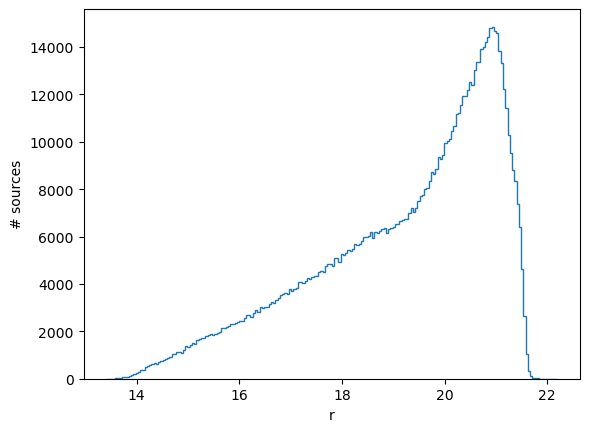

In [6]:
plt.hist(tha21['rmag'], bins=200, histtype='step');
plt.xlabel('r')
plt.ylabel('# sources')

In [90]:
# tha21 = pd.read_table("data/stripe82calibStars_v4.2.dat", 
#                       header=None, comment='#', sep="\s+", 
#                       names=["CALIBSTARS", "RA_tha21", "Dec_tha21", "RArms_tha21", "Decrms_tha21", 
#                              "Ntot_tha21", "Ar_tha21", 
#                              "uNobs", "ummed", "ummu", "umsig", "umrms", "umchi2", 
#                              "gNobs", "gmmed", "gmmu", "gmsig", "gmrms", "gmchi2", 
#                              "rNobs", "rmmed", "rmmu", "rmsig", "rmrms", "rmchi2", 
#                              "iNobs", "immed", "immu", "imsig", "imrms", "imchi2", 
#                              "zNobs", "zmmed", "zmmu", "zmsig", "zmrms", "zmchi2"])

# tha21['tha21oid'] = tha21['CALIBSTARS'].str.strip("CALIBSTARS_").astype('int')
tha21 = Table.from_pandas(tha21)

Cross-match with Gaia DR3 sources that have XP spectra. Since a precomputed SDSS-Gaia DR3 crossmatch is already in the Archive, and the Thanjavur '21 sample does not have original SDSS source ids (i.e. objid), first crossmatch S82 against Archive SDSS DR13 photoprimary.

In [9]:
tha21_coord = tha21[['CALIBSTARS', 'ra', 'dec']]

table_name='tha21_coo'
fqtn = "user_lpalaver.tha21_coo"
xm_table_name = 'tha21_sdss_xmatch_table'

try:
    Gaia.delete_user_table(table_name)
    print("Table deleted.")
except:
    print("Nothing to delete.")

Gaia.upload_table(upload_resource=tha21_coord, table_name=table_name)

Nothing to delete.
INFO: Sending pytable. [astroquery.utils.tap.core]
INFO: Uploaded table 'tha21_coo'. [astroquery.utils.tap.core]


Watch out! Column names are converted to lowercase!

In [20]:
# Gaia.update_user_table(fqtn, list_of_changes=[["ra","flags","Ra"], ["dec","flags","Dec"]])

Gaia.update_user_table(table_name=fqtn, list_of_changes=[["ra", "flags", "Ra"], ["dec", "flags", "Dec"]], verbose=True)

Retrieving table 'user_lpalaver.tha21_coo'
------>https
host = gea.esac.esa.int:443
context = /tap-server/tap/tables?tables=user_lpalaver.tha21_coo
200 200
Parsing table 'user_lpalaver.tha21_coo'...
Done.
------>https
host = gea.esac.esa.int:443
context = /tap-server/TableTool
Content-type = application/x-www-form-urlencoded
200 200
[('Date', 'Wed, 20 Nov 2024 12:50:00 GMT'), ('Server', 'Apache/2.4.6 (CentOS) OpenSSL/1.0.2k-fips mod_jk/1.2.43'), ('Cache-Control', 'no-cache, no-store, max-age=0, must-revalidate'), ('Pragma', 'no-cache'), ('Expires', '0'), ('X-XSS-Protection', '1; mode=block'), ('X-Frame-Options', 'SAMEORIGIN'), ('X-Content-Type-Options', 'nosniff'), ('Transfer-Encoding', 'chunked'), ('Content-Type', 'text/plain;charset=ISO-8859-1')]
INFO: Table 'user_lpalaver.tha21_coo' updated. [astroquery.utils.tap.core]


In [21]:
try:
    Gaia.delete_user_table(xm_table_name)
except:
    pass
Gaia.cross_match(full_qualified_table_name_a=fqtn, 
                full_qualified_table_name_b='external.sdssdr13_photoprimary',
                results_table_name=xm_table_name, 
                radius=1.)

INFO: Query finished. [astroquery.utils.tap.core]


In [33]:
query = 'SELECT A.*, BN.*, D.*, G.phot_g_mean_mag, G.ra, G.dec, S.psfmag_r \
         FROM user_lpalaver.tha21_sdss_xmatch_table AS A \
         JOIN gaiadr3.sdssdr13_best_neighbour AS BN ON BN.original_ext_source_id = A.sdssdr13_photoprimary_objid \
         JOIN gaiadr3.gaia_source AS G ON G.source_id = BN.source_id \
         JOIN external.sdssdr13_photoprimary AS S ON S.objid = A.sdssdr13_photoprimary_objid \
         JOIN external.gaiaedr3_distance AS D ON D.source_id = BN.source_id'

job = Gaia.launch_job_async(query=query)
results = job.get_results()
# print(f"results = {results}")

INFO: Query finished. [astroquery.utils.tap.core]


Text(0, 0.5, '# sources')

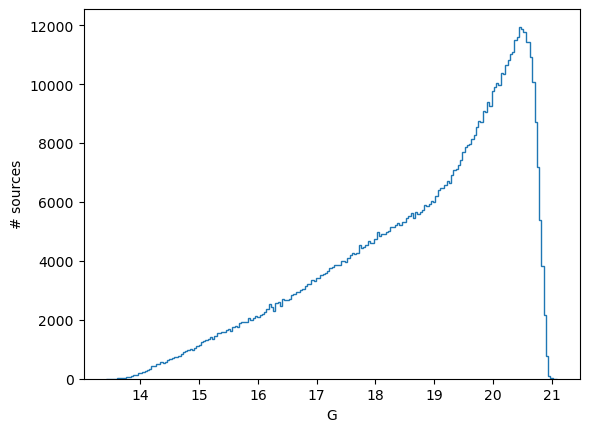

In [34]:
plt.hist(results['phot_g_mean_mag'], bins=200, histtype='step');
plt.xlabel('G')
plt.ylabel('# sources')

The very faint sources are probably QSOs and WDs. Check for duplicates in the crossmatch. 

In [261]:
results

sdssdr13_photoprimary_objid,separation,tha21_coo_tha21_coo_oid,SOURCE_ID,clean_sdssdr13_oid,original_ext_source_id,angular_distance,number_of_neighbours,number_of_mates,xm_flag,source_id,r_med_geo,r_lo_geo,r_hi_geo,r_med_photogeo,r_lo_photogeo,r_hi_photogeo,flag,phot_g_mean_mag,ra,dec,psfmag_r
,deg,,,,,arcsec,,,,,pc,pc,pc,pc,pc,pc,,mag,deg,deg,mag
int64,float64,int32,int64,int32,int64,float32,int16,int16,int16,int64,float32,float32,float32,float32,float32,float32,object,float32,float64,float64,float32
1237678437018173532,1.3856500943021969e-05,1,357616157105664,85143342,1237678437018173532,0.02645092,1,0,40,357616157105664,1594.2067,1399.5448,1908.2753,1851.6627,1679.4363,2101.2292,10033,17.312464,43.7871190244199,1.0377688071460593,17.27158
1237678437018173471,2.5346958636493162e-05,2,357551733142912,85170622,1237678437018173471,0.04505873,1,0,40,357551733142912,3705.6453,2953.559,4738.009,3590.448,3008.669,4327.6567,10033,16.97933,43.82812766518666,1.0401899740215323,16.96365
1237678437018173628,3.6784815433501237e-06,3,357375638820864,84991159,1237678437018173628,0.034542136,1,0,40,357375638820864,2053.0103,1607.8906,2775.015,1259.637,1156.3038,1397.1599,10033,18.636305,43.83157606493478,1.0241399802410531,18.81566
1237678437018173580,1.6799742400352246e-05,4,356276127187584,84510095,1237678437018173580,0.081962675,1,0,40,356276127187584,1910.1232,1454.2926,3243.5,7017.557,5863.2637,8582.184,10033,19.248898,43.87026058039418,0.9835666633736622,19.24415
1237678437018173584,3.049287361373195e-05,5,356860242746496,85038212,1237678437018173584,0.06381835,1,0,40,356860242746496,1825.6571,1550.9818,2326.8843,1875.4974,1646.9366,2149.4507,10033,17.123661,43.884380390695924,1.0283739009376607,17.0998
1237678437018239049,1.3686390306689638e-05,6,356894602484992,85079625,1237678437018239049,0.029075755,1,0,40,356894602484992,1204.2611,1070.9426,1409.4265,1429.5022,1255.0386,1651.4534,10033,17.508062,43.90141952732937,1.0320726178661623,17.49091
1237678437018239056,2.825598087580786e-05,7,352221678055936,84054780,1237678437018239056,0.03037848,1,0,40,352221678055936,542.7329,515.10254,578.4981,539.0087,514.84827,567.8663,10033,17.285278,43.91896499160753,0.9461207499079669,17.49856
1237678437018239119,2.99615977073547e-05,8,352118598838400,83834798,1237678437018239119,0.041585825,1,0,40,352118598838400,384.0963,365.91446,404.66513,389.28067,366.20477,424.20737,10033,18.09326,43.923440438691934,0.9269617618774144,18.63898


In [262]:
u = unique(results, keys='tha21_coo_tha21_coo_oid', keep='none')
duplicates = setdiff(results, u, keys='sdssdr13_photoprimary_objid')

Pragmatic solution: remove duplicates.

In [263]:
df = results.to_pandas()

In [264]:
df = df.drop(columns=['SOURCE_ID', 'original_ext_source_id'])
df['tha21_coo_tha21_coo_oid'] = df['tha21_coo_tha21_coo_oid'] - 1

In [265]:
df.set_index("tha21_coo_tha21_coo_oid", inplace=True)
df.to_csv("S82_xm_GEDR3_photogeo_dist.csv") #, index_label="tha21_coo_tha21_coo_oid", index=True)
df

,sdssdr13_photoprimary_objid,separation,clean_sdssdr13_oid,angular_distance,number_of_neighbours,number_of_mates,xm_flag,source_id,r_med_geo,r_lo_geo,r_hi_geo,r_med_photogeo,r_lo_photogeo,r_hi_photogeo,flag,phot_g_mean_mag,ra,dec,psfmag_r
tha21_coo_tha21_coo_oid,,,,,,,,,,,,,,,,,,,
0,1237678437018173532,1.385650e-05,85143342,0.026451,1,0,40,357616157105664,1594.206665,1399.544800,1908.275269,1851.662720,1679.436279,2101.229248,10033,17.312464,43.787119,1.037769,17.271580
1,1237678437018173471,2.534696e-05,85170622,0.045059,1,0,40,357551733142912,3705.645264,2953.559082,4738.008789,3590.447998,3008.668945,4327.656738,10033,16.979330,43.828128,1.040190,16.963650
2,1237678437018173628,3.678482e-06,84991159,0.034542,1,0,40,357375638820864,2053.010254,1607.890625,2775.014893,1259.636963,1156.303833,1397.159912,10033,18.636305,43.831576,1.024140,18.815660
3,1237678437018173580,1.679974e-05,84510095,0.081963,1,0,40,356276127187584,1910.123169,1454.292603,3243.500000,7017.557129,5863.263672,8582.183594,10033,19.248898,43.870261,0.983567,19.244150
4,1237678437018173584,3.049287e-05,85038212,0.063818,1,0,40,356860242746496,1825.657104,1550.981812,2326.884277,1875.497437,1646.936646,2149.450684,10033,17.123661,43.884380,1.028374,17.099800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952384,1237663542066152456,1.242442e-05,61054813,0.043743,1,0,8,6917176909042609280,3929.345703,1814.947144,5917.892578,16550.371094,14377.678711,19397.869141,20033,20.583330,316.033138,-0.939934,20.547720
952385,1237663542066152459,5.041680e-07,61401468,0.043675,1,0,8,6917177115201067392,3372.352539,1461.194702,6042.623535,3237.675293,1707.936035,4178.098633,20023,20.607058,316.041255,-0.909738,20.620310
952390,1237663542066152186,1.118333e-05,60406695,0.013079,1,0,8,6917172648434990464,2929.349121,1516.940308,5099.801270,6440.014160,5425.117188,7564.743652,20033,20.684376,316.139950,-0.993446,20.655880


In [5]:
# df = Table.from_pandas(df)
df = pd.read_csv("S82_xm_GEDR3_photogeo_dist.csv", index_col='tha21_coo_tha21_coo_oid')
df

,sdssdr13_photoprimary_objid,separation,clean_sdssdr13_oid,angular_distance,number_of_neighbours,number_of_mates,xm_flag,source_id,r_med_geo,r_lo_geo,r_hi_geo,r_med_photogeo,r_lo_photogeo,r_hi_photogeo,flag,phot_g_mean_mag,ra,dec,psfmag_r
tha21_coo_tha21_coo_oid,,,,,,,,,,,,,,,,,,,
0,1237678437018173532,1.385650e-05,85143342,0.026451,1,0,40,357616157105664,1594.2067,1399.54480,1908.2753,1851.6627,1679.4363,2101.2292,10033,17.312464,43.787119,1.037769,17.27158
1,1237678437018173471,2.534696e-05,85170622,0.045059,1,0,40,357551733142912,3705.6453,2953.55900,4738.0090,3590.4480,3008.6690,4327.6567,10033,16.979330,43.828128,1.040190,16.96365
2,1237678437018173628,3.678482e-06,84991159,0.034542,1,0,40,357375638820864,2053.0103,1607.89060,2775.0150,1259.6370,1156.3038,1397.1599,10033,18.636305,43.831576,1.024140,18.81566
3,1237678437018173580,1.679974e-05,84510095,0.081963,1,0,40,356276127187584,1910.1232,1454.29260,3243.5000,7017.5570,5863.2637,8582.1840,10033,19.248898,43.870261,0.983567,19.24415
4,1237678437018173584,3.049287e-05,85038212,0.063818,1,0,40,356860242746496,1825.6571,1550.98180,2326.8843,1875.4974,1646.9366,2149.4507,10033,17.123661,43.884380,1.028374,17.09980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952384,1237663542066152456,1.242442e-05,61054813,0.043743,1,0,8,6917176909042609280,3929.3457,1814.94710,5917.8926,16550.3710,14377.6790,19397.8700,20033,20.583330,316.033138,-0.939934,20.54772
952385,1237663542066152459,5.041680e-07,61401468,0.043675,1,0,8,6917177115201067392,3372.3525,1461.19470,6042.6235,3237.6753,1707.9360,4178.0986,20023,20.607058,316.041255,-0.909738,20.62031
952390,1237663542066152186,1.118333e-05,60406695,0.013079,1,0,8,6917172648434990464,2929.3490,1516.94030,5099.8013,6440.0140,5425.1170,7564.7437,20033,20.684376,316.139950,-0.993446,20.65588


In [9]:
# tha21 = tha21.to_pandas()
tha21

,_healpix_29,CALIBSTARS,ra,dec,RArms,Decrms,Ntot,Ar,uNobs,umag,ummu,uErr,umrms,umchi2,gNobs,gmag,gmmu,gErr,gmrms,gmchi2,rNobs,rmag,rmmu,rErr,rmrms,rmchi2,iNobs,imag,immu,iErr,imrms,imchi2,zNobs,zmag,zmmu,zErr,zmrms,zmchi2,Norder,Dir,Npix,Mr,FeH,MrEst,MrEstUnc,FeHEst,ug,gr,gi,ri,iz,ugErr,grErr,giErr,riErr,izErr,glon,glat
0,178820370416688,891163,43.787097,1.037784,0.0282,0.0282,24,0.256,23,19.544,19.547,0.007,0.044,1.034,22,17.958,17.958,0.004,0.015,0.710,21,17.287,17.288,0.003,0.004,0.302,22,17.024,17.027,0.003,0.014,0.949,23,16.886,16.891,0.004,0.017,0.835,4,0,0,-99,-99,-99,-99,-99,1.586,0.671,0.934,0.263,0.138,0.008062,0.005000,0.005000,0.004243,0.005000,174.537601,-49.030895
1,178775253286992,891187,43.828101,1.040223,0.4066,0.4066,47,0.253,24,18.470,18.469,0.005,0.028,1.098,24,17.380,17.378,0.004,0.019,1.014,23,16.973,16.973,0.003,0.013,0.944,23,16.812,16.810,0.003,0.009,0.627,24,16.748,16.750,0.004,0.011,0.611,4,0,0,-99,-99,-99,-99,-99,1.090,0.407,0.568,0.161,0.064,0.006403,0.005000,0.005000,0.004243,0.005000,174.579778,-49.000538
2,178692611270558,891200,43.831573,1.024147,0.0315,0.0315,25,0.254,8,22.873,22.887,0.136,0.150,0.342,24,20.266,20.267,0.006,0.022,0.760,23,18.816,18.814,0.004,0.009,0.450,25,18.018,18.023,0.003,0.015,0.829,25,17.567,17.566,0.005,0.018,0.706,4,0,0,-99,-99,-99,-99,-99,2.607,1.450,2.248,0.798,0.451,0.136132,0.007211,0.006708,0.005000,0.005831,174.600676,-49.009624
3,178139752091901,891206,43.870259,0.983584,0.0259,0.0259,25,0.253,25,21.136,21.113,0.019,0.090,0.760,25,19.771,19.775,0.005,0.019,0.586,25,19.245,19.242,0.004,0.016,0.742,25,19.030,19.033,0.004,0.017,0.784,24,18.919,18.924,0.010,0.036,0.787,4,0,0,-99,-99,-99,-99,-99,1.365,0.526,0.741,0.215,0.111,0.019647,0.006403,0.006403,0.005657,0.010770,174.686073,-49.011621
4,178442591206321,891209,43.884348,1.028387,0.0506,0.0506,25,0.251,25,19.421,19.411,0.007,0.036,1.130,25,17.740,17.738,0.004,0.021,0.949,25,17.089,17.090,0.003,0.011,0.764,24,16.850,16.848,0.003,0.016,1.029,23,16.731,16.730,0.004,0.014,0.744,4,0,0,-99,-99,-99,-99,-99,1.681,0.651,0.890,0.239,0.119,0.008062,0.005000,0.005000,0.004243,0.005000,174.653707,-48.969732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952395,3458587837391950679,218913,316.124689,-0.984808,0.0322,0.0322,16,0.175,12,21.903,21.876,0.058,0.182,0.693,14,21.165,21.165,0.013,0.032,0.688,15,20.899,20.895,0.013,0.036,0.570,16,20.793,20.768,0.017,0.051,0.701,10,20.744,20.665,0.066,0.158,0.791,4,0,3071,-99,-99,-99,-99,-99,0.738,0.266,0.372,0.106,0.049,0.059439,0.018385,0.021401,0.021401,0.068154,48.618385,-29.731558
952396,3458588330308145677,218915,316.057052,-0.958560,0.0349,0.0349,15,0.185,9,22.975,22.955,0.138,0.163,0.371,15,21.535,21.545,0.017,0.071,0.908,14,21.020,21.002,0.015,0.055,1.019,15,20.820,20.774,0.017,0.068,1.157,13,20.602,20.582,0.054,0.096,0.502,4,0,3071,-99,-99,-99,-99,-99,1.440,0.515,0.715,0.200,0.218,0.139043,0.022672,0.024042,0.022672,0.056613,48.604161,-29.660076
952397,3458587856950236370,218917,316.133306,-0.971373,0.0410,0.0410,16,0.174,3,24.789,24.878,0.611,0.090,0.095,13,22.356,22.341,0.034,0.075,0.577,16,21.081,21.081,0.015,0.061,0.923,16,20.525,20.510,0.013,0.057,1.156,13,20.048,20.061,0.034,0.200,1.482,4,0,3071,-99,-99,-99,-99,-99,2.433,1.275,1.831,0.556,0.477,0.611945,0.037162,0.036401,0.019849,0.036401,48.636757,-29.732016
952398,3458585732920967238,218918,316.174186,-1.044566,0.0474,0.0474,26,0.177,7,22.501,22.493,0.110,0.065,0.192,21,21.422,21.401,0.013,0.086,1.437,20,20.976,20.959,0.011,0.065,1.140,21,20.750,20.741,0.014,0.067,0.846,19,20.744,20.697,0.047,0.119,0.617,4,0,3071,-99,-99,-99,-99,-99,1.079,0.446,0.672,0.226,0.006,0.110766,0.017029,0.019105,0.017804,0.049041,48.588761,-29.804763


In [11]:
final = tha21.join(df, lsuffix="", rsuffix="Gaia", how="inner")
final['M'] = final['rmag'] - 5 * np.log10(final['r_med_photogeo'] + 5)

In [12]:
final 

,_healpix_29,CALIBSTARS,ra,dec,RArms,Decrms,Ntot,Ar,uNobs,umag,ummu,uErr,umrms,umchi2,gNobs,gmag,gmmu,gErr,gmrms,gmchi2,rNobs,rmag,rmmu,rErr,rmrms,rmchi2,iNobs,imag,immu,iErr,imrms,imchi2,zNobs,zmag,zmmu,zErr,zmrms,zmchi2,Norder,Dir,Npix,Mr,FeH,MrEst,MrEstUnc,FeHEst,ug,gr,gi,ri,iz,ugErr,grErr,giErr,riErr,izErr,glon,glat,sdssdr13_photoprimary_objid,separation,clean_sdssdr13_oid,angular_distance,number_of_neighbours,number_of_mates,xm_flag,source_id,r_med_geo,r_lo_geo,r_hi_geo,r_med_photogeo,r_lo_photogeo,r_hi_photogeo,flag,phot_g_mean_mag,raGaia,decGaia,psfmag_r,M
0,178820370416688,891163,43.787097,1.037784,0.0282,0.0282,24,0.256,23,19.544,19.547,0.007,0.044,1.034,22,17.958,17.958,0.004,0.015,0.710,21,17.287,17.288,0.003,0.004,0.302,22,17.024,17.027,0.003,0.014,0.949,23,16.886,16.891,0.004,0.017,0.835,4,0,0,-99,-99,-99,-99,-99,1.586,0.671,0.934,0.263,0.138,0.008062,0.005000,0.005000,0.004243,0.005000,174.537601,-49.030895,1237678437018173532,1.385650e-05,85143342,0.026451,1,0,40,357616157105664,1594.2067,1399.54480,1908.2753,1851.6627,1679.4363,2101.2292,10033,17.312464,43.787119,1.037769,17.27158,0.943335
1,178775253286992,891187,43.828101,1.040223,0.4066,0.4066,47,0.253,24,18.470,18.469,0.005,0.028,1.098,24,17.380,17.378,0.004,0.019,1.014,23,16.973,16.973,0.003,0.013,0.944,23,16.812,16.810,0.003,0.009,0.627,24,16.748,16.750,0.004,0.011,0.611,4,0,0,-99,-99,-99,-99,-99,1.090,0.407,0.568,0.161,0.064,0.006403,0.005000,0.005000,0.004243,0.005000,174.579778,-49.000538,1237678437018173471,2.534696e-05,85170622,0.045059,1,0,40,357551733142912,3705.6453,2953.55900,4738.0090,3590.4480,3008.6690,4327.6567,10033,16.979330,43.828128,1.040190,16.96365,-0.805765
2,178692611270558,891200,43.831573,1.024147,0.0315,0.0315,25,0.254,8,22.873,22.887,0.136,0.150,0.342,24,20.266,20.267,0.006,0.022,0.760,23,18.816,18.814,0.004,0.009,0.450,25,18.018,18.023,0.003,0.015,0.829,25,17.567,17.566,0.005,0.018,0.706,4,0,0,-99,-99,-99,-99,-99,2.607,1.450,2.248,0.798,0.451,0.136132,0.007211,0.006708,0.005000,0.005831,174.600676,-49.009624,1237678437018173628,3.678482e-06,84991159,0.034542,1,0,40,357375638820864,2053.0103,1607.89060,2775.0150,1259.6370,1156.3038,1397.1599,10033,18.636305,43.831576,1.024140,18.81566,3.306171
3,178139752091901,891206,43.870259,0.983584,0.0259,0.0259,25,0.253,25,21.136,21.113,0.019,0.090,0.760,25,19.771,19.775,0.005,0.019,0.586,25,19.245,19.242,0.004,0.016,0.742,25,19.030,19.033,0.004,0.017,0.784,24,18.919,18.924,0.010,0.036,0.787,4,0,0,-99,-99,-99,-99,-99,1.365,0.526,0.741,0.215,0.111,0.019647,0.006403,0.006403,0.005657,0.010770,174.686073,-49.011621,1237678437018173580,1.679974e-05,84510095,0.081963,1,0,40,356276127187584,1910.1232,1454.29260,3243.5000,7017.5570,5863.2637,8582.1840,10033,19.248898,43.870261,0.983567,19.24415,0.012524
4,178442591206321,891209,43.884348,1.028387,0.0506,0.0506,25,0.251,25,19.421,19.411,0.007,0.036,1.130,25,17.740,17.738,0.004,0.021,0.949,25,17.089,17.090,0.003,0.011,0.764,24,16.850,16.848,0.003,0.016,1.029,23,16.731,16.730,0.004,0.014,0.744,4,0,0,-99,-99,-99,-99,-99,1.681,0.651,0.890,0.239,0.119,0.008062,0.005000,0.005000,0.004243,0.005000,174.653707,-48.969732,1237678437018173584,3.049287e-05,85038212,0.063818,1,0,40,356860242746496,1825.6571,1550.98180,2326.8843,1875.4974,1646.9366,2149.4507,10033,17.123661,43.884380,1.028374,17.09980,0.717636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952384,3458588467819226874,218184,316.033129,-0.939930,0.0307,0.0307,15,0.191,13,21.911,21.882,0.051,0.142,0.845,15,21.019,21.022,0.011,0.051,0.872,15,20.612,20.606,0.011,0.051,1.343,15,20.487,20.451,0.013,0.069,1.553,12,20.332,20.322,0.045,0.176,1.065,4,0,3071,-99,-99,-99,-99,-99,0.892,0.407,0.532,0.125,0.155,0.052173,0.015556,0.017029,0.017029,0

### Verify that cross-match is OK

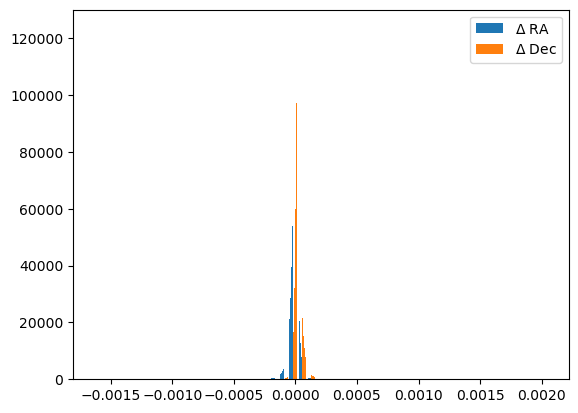

In [13]:
plt.hist([final.ra-final.raGaia, final.dec-final.decGaia], bins=500, label=[r"$\Delta$ RA", (r"$\Delta$ Dec")]);
# plt.colorbar()
# plt.xlabel(r"$\Delta$ RA")
# plt.xlabel(r"$\Delta$ Dec")
plt.legend()

Make HRD for selection

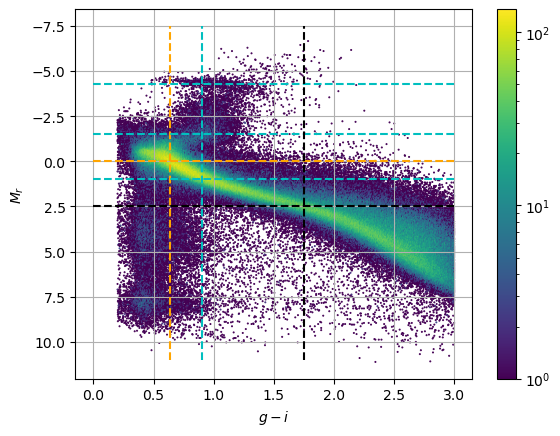

In [14]:
plt.hexbin(final.gmag-final.imag, final.M, mincnt=1, bins='log', gridsize=500)
plt.gca().invert_yaxis()
plt.xlabel(r"$g-i$")
plt.ylabel(r"$M_r$")
plt.colorbar()
plt.grid()

plt.vlines(0.64, 11, -7.5, colors='orange', linestyles='--')
plt.hlines(0., 0., 3., colors='orange', linestyles='--')

plt.vlines(0.9, 11, -7.5, colors='c', linestyles='--')
plt.hlines(1., 0., 3., colors='c', linestyles='--')
plt.hlines(-1.5, 0., 3., colors='c', linestyles='--')
plt.hlines(-4.3, 0., 3., colors='c', linestyles='--')

plt.vlines(1.75, 11, -7.5, colors='k', linestyles='--')
plt.hlines(2.5, 0., 3., colors='k', linestyles='--')


In [15]:
final = lsdb.from_dataframe(final, lowest_order=5, highest_order=5)
final

,CALIBSTARS,ra,dec,RArms,Decrms,Ntot,Ar,uNobs,umag,ummu,uErr,umrms,umchi2,gNobs,gmag,gmmu,gErr,gmrms,gmchi2,rNobs,rmag,rmmu,rErr,rmrms,rmchi2,iNobs,imag,immu,iErr,imrms,imchi2,zNobs,zmag,zmmu,zErr,zmrms,zmchi2,Mr,FeH,MrEst,MrEstUnc,FeHEst,ug,gr,gi,ri,iz,ugErr,grErr,giErr,riErr,izErr,glon,glat,sdssdr13_photoprimary_objid,separation,clean_sdssdr13_oid,angular_distance,number_of_neighbours,number_of_mates,xm_flag,source_id,r_med_geo,r_lo_geo,r_hi_geo,r_med_photogeo,r_lo_photogeo,r_hi_photogeo,flag,phot_g_mean_mag,raGaia,decGaia,psfmag_r,M,Norder,Dir,Npix
npartitions=199,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,int64[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],int64[pyarrow],double[pyarrow],int64[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],int64[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],int64[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],int64[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],int64[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],int64[pyarrow],int64[pyarrow],int64[pyarrow],int64[pyarrow],int64[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],int64[pyarrow],double[pyarrow],int64[pyarrow],double[pyarrow],int64[pyarrow],int64[pyarrow],int64[pyarrow],int64[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],int64[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],uint8[pyarrow],uint64[pyarrow],uint64[pyarrow]
281474976710656,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3458483038843830272,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3458764513820540928,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [312]:
final.get_healpix_pixels()

[Order: 5, Pixel: 0,
 Order: 5, Pixel: 1,
 Order: 5, Pixel: 2,
 Order: 5, Pixel: 3072,
 Order: 5, Pixel: 3073,
 Order: 5, Pixel: 3074,
 Order: 5, Pixel: 4349,
 Order: 5, Pixel: 4350,
 Order: 5, Pixel: 4351,
 Order: 5, Pixel: 4413,
 Order: 5, Pixel: 4414,
 Order: 5, Pixel: 4415,
 Order: 5, Pixel: 4429,
 Order: 5, Pixel: 4430,
 Order: 5, Pixel: 4431,
 Order: 5, Pixel: 4433,
 Order: 5, Pixel: 4434,
 Order: 5, Pixel: 4435,
 Order: 5, Pixel: 4436,
 Order: 5, Pixel: 4437,
 Order: 5, Pixel: 4438,
 Order: 5, Pixel: 4439,
 Order: 5, Pixel: 4440,
 Order: 5, Pixel: 4441,
 Order: 5, Pixel: 4442,
 Order: 5, Pixel: 4443,
 Order: 5, Pixel: 4444,
 Order: 5, Pixel: 4445,
 Order: 5, Pixel: 4446,
 Order: 5, Pixel: 4449,
 Order: 5, Pixel: 4450,
 Order: 5, Pixel: 4451,
 Order: 5, Pixel: 4452,
 Order: 5, Pixel: 4453,
 Order: 5, Pixel: 4454,
 Order: 5, Pixel: 4455,
 Order: 5, Pixel: 4456,
 Order: 5, Pixel: 4457,
 Order: 5, Pixel: 4458,
 Order: 5, Pixel: 4459,
 Order: 5, Pixel: 4460,
 Order: 5, Pixel: 4461,
 

In [16]:
final = final.compute()

In [17]:
final

,CALIBSTARS,ra,dec,RArms,Decrms,Ntot,Ar,uNobs,umag,ummu,uErr,umrms,umchi2,gNobs,gmag,gmmu,gErr,gmrms,gmchi2,rNobs,rmag,rmmu,rErr,rmrms,rmchi2,iNobs,imag,immu,iErr,imrms,imchi2,zNobs,zmag,zmmu,zErr,zmrms,zmchi2,Mr,FeH,MrEst,MrEstUnc,FeHEst,ug,gr,gi,ri,iz,ugErr,grErr,giErr,riErr,izErr,glon,glat,sdssdr13_photoprimary_objid,separation,clean_sdssdr13_oid,angular_distance,number_of_neighbours,number_of_mates,xm_flag,source_id,r_med_geo,r_lo_geo,r_hi_geo,r_med_photogeo,r_lo_photogeo,r_hi_photogeo,flag,phot_g_mean_mag,raGaia,decGaia,psfmag_r,M,Norder,Dir,Npix
_healpix_29,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
178820370416688,891163,43.787097,1.037784,0.0282,0.0282,24,0.256,23,19.544,19.547,0.007,0.044,1.034,22,17.958,17.958,0.004,0.015,0.71,21,17.287,17.288,0.003,0.004,0.302,22,17.024,17.027,0.003,0.014,0.949,23,16.886,16.891,0.004,0.017,0.835,-99,-99,-99,-99,-99,1.586,0.671,0.934,0.263,0.138,0.008062,0.005,0.005,0.004243,0.005,174.537601,-49.030895,1237678437018173532,0.000014,85143342,0.026451,1,0,40,357616157105664,1594.2067,1399.5448,1908.2753,1851.6627,1679.4363,2101.2292,10033,17.312464,43.787119,1.037769,17.27158,0.943335,5,0,0
178775253286992,891187,43.828101,1.040223,0.4066,0.4066,47,0.253,24,18.47,18.469,0.005,0.028,1.098,24,17.38,17.378,0.004,0.019,1.014,23,16.973,16.973,0.003,0.013,0.944,23,16.812,16.81,0.003,0.009,0.627,24,16.748,16.75,0.004,0.011,0.611,-99,-99,-99,-99,-99,1.09,0.407,0.568,0.161,0.064,0.006403,0.005,0.005,0.004243,0.005,174.579778,-49.000538,1237678437018173471,0.000025,85170622,0.045059,1,0,40,357551733142912,3705.6453,2953.559,4738.009,3590.448,3008.669,4327.6567,10033,16.97933,43.828128,1.04019,16.96365,-0.805765,5,0,0
178692611270558,891200,43.831573,1.024147,0.0315,0.0315,25,0.254,8,22.873,22.887,0.136,0.15,0.342,24,20.266,20.267,0.006,0.022,0.76,23,18.816,18.814,0.004,0.009,0.45,25,18.018,18.023,0.003,0.015,0.829,25,17.567,17.566,0.005,0.018,0.706,-99,-99,-99,-99,-99,2.607,1.45,2.248,0.798,0.451,0.136132,0.007211,0.006708,0.005,0.005831,174.600676,-49.009624,1237678437018173628,0.000004,84991159,0.034542,1,0,40,357375638820864,2053.0103,1607.8906,2775.015,1259.637,1156.3038,1397.1599,10033,18.636305,43.831576,1.02414,18.81566,3.306171,5,0,0
178139752091901,891206,43.870259,0.983584,0.0259,0.0259,25,0.253,25,21.136,21.113,0.019,0.09,0.76,25,19.771,19.775,0.005,0.019,0.586,25,19.245,19.242,0.004,0.016,0.742,25,19.03,19.033,0.004,0.017,0.784,24,18.919,18.924,0.01,0.036,0.787,-99,-99,-99,-99,-99,1.365,0.526,0.741,0.215,0.111,0.019647,0.006403,0.006403,0.005657,0.01077,174.686073,-49.011621,1237678437018173580,0.000017,84510095,0.081963,1,0,40,356276127187584,1910.1232,1454.2926,3243.5,7017.557,5863.2637,8582.184,10033,19.248898,43.870261,0.983567,19.24415,0.012524,5,0,0
178442591206321,891209,43.884348,1.028387,0.0506,0.0506,25,0.251,25,19.421,19.411,0.007,0.036,1.13,25,17.74,17.738,0.004,0.021,0.949,25,17.089,17.09,0.003,0.011,0.764,24,16.85,16.848,0.003,0.016,1.029,23,16.731,16.73,0.004,0.014,0.744,-99,-99,-99,-99,-99,1.681,0.651,0.89,0.239,0.119,0.008062,0.005,0.005,0.004243,0.005,174.653707,-48.969732,1237678437018173584,0.00003,85038212,0.063818,1,0,40,356860242746496,1825.6571,1550.9818,2326.8843,1875.4974,1646.9366,2149.4507,10033,17.123661,43.88438,1.028374,17.0998,0.717636,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3458588467819226874,218184,316.033129,-0.93993,0.0307,0.0307,15,0.191,13,21.911,21.882,0.051,0.142,0.845,15,21.019,21.022,0.011,0.051,0.872,15,20.612,20.606,0.011,0.051,1.343,15,20.487,20.451,0.013,0.069,1.553,12,20.332,20.322,0.045,0.176,1.065,-99,-99,-99,-99,-99,0.892,0.407,0.532,0.125,0.155,0.052173,0.015556,0.017029,0.017029,0.04684,48.60835,-29.629976,1237663542066152456,

In [18]:
MSbright_filt = (final.gi>0.63) & (final.gi<0.65) & (final.M>-0.01 ) & (final.M<0.01)

MS1_filt = (final.gi>0.89) & (final.gi<0.91) & (final.M>0.99) & (final.M<1.01)
RG1_filt = (final.gi>0.89) & (final.gi<0.91) & (final.M<-1.49) & (final.M>-1.51)
RG2_filt = (final.gi>0.89) & (final.gi<0.91) & (final.M<-4.29) & (final.M>-4.31)

MS2_filt = (final.gi>1.74) & (final.gi<0.76) & (final.M>2.49 )& (final.M<2.51)

In [19]:
MSbright = final[MSbright_filt]
MSbright.sort_values("CALIBSTARS")

,CALIBSTARS,ra,dec,RArms,Decrms,Ntot,Ar,uNobs,umag,ummu,uErr,umrms,umchi2,gNobs,gmag,gmmu,gErr,gmrms,gmchi2,rNobs,rmag,rmmu,rErr,rmrms,rmchi2,iNobs,imag,immu,iErr,imrms,imchi2,zNobs,zmag,zmmu,zErr,zmrms,zmchi2,Mr,FeH,MrEst,MrEstUnc,FeHEst,ug,gr,gi,ri,iz,ugErr,grErr,giErr,riErr,izErr,glon,glat,sdssdr13_photoprimary_objid,separation,clean_sdssdr13_oid,angular_distance,number_of_neighbours,number_of_mates,xm_flag,source_id,r_med_geo,r_lo_geo,r_hi_geo,r_med_photogeo,r_lo_photogeo,r_hi_photogeo,flag,phot_g_mean_mag,raGaia,decGaia,psfmag_r,M,Norder,Dir,Npix
_healpix_29,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2113281452339137039,3251,308.969564,-0.768379,0.0142,0.0142,7,0.334,7,20.568,20.554,0.025,0.076,1.105,7,19.394,19.386,0.006,0.019,1.246,7,18.94,18.945,0.005,0.016,0.964,5,18.744,18.745,0.007,0.003,0.233,7,18.685,18.682,0.015,0.037,0.969,-99,-99,-99,-99,-99,1.174,0.454,0.65,0.196,0.059,0.02571,0.00781,0.00922,0.008602,0.016553,44.80219,-23.438281,1237656567573644284,0.000005,63059664,0.016851,1,0,8,4226562898066490624,3951.7195,2111.9348,9884.856,6132.169,4828.301,8214.725,10033,18.947199,308.969557,-0.7684,18.92942,0.00016,5,0,7507
2113152528717825965,13445,309.827351,-1.095769,0.0174,0.0174,8,0.234,8,21.151,21.136,0.034,0.112,1.112,8,20.074,20.068,0.008,0.013,0.607,8,19.628,19.633,0.007,0.022,1.037,8,19.443,19.446,0.008,0.011,0.448,7,19.348,19.338,0.024,0.028,0.361,-99,-99,-99,-99,-99,1.077,0.446,0.631,0.185,0.095,0.034928,0.01063,0.011314,0.01063,0.025298,44.951496,-24.346108,1237656567037166999,0.000009,59182798,0.027515,1,0,8,4226305028228624512,2352.3245,1531.7527,4157.959,8397.671,7027.6084,10045.905,10033,19.626959,309.827356,-1.09579,19.62482,0.005913,5,0,7507
2113307871302842990,15345,309.152802,-0.300953,0.0223,0.0223,8,0.322,7,21.271,21.272,0.039,0.041,0.402,8,20.111,20.108,0.007,0.035,1.718,8,19.665,19.664,0.006,0.032,1.668,7,19.48,19.481,0.009,0.015,0.593,8,19.434,19.432,0.025,0.052,0.795,-99,-99,-99,-99,-99,1.16,0.446,0.631,0.185,0.046,0.039623,0.00922,0.011402,0.010817,0.026571,45.343762,-23.367345,1237656568110581458,0.000006,68802179,0.028035,1,0,8,4226615708983792896,1440.8195,1006.8476,2726.7554,8580.159,7182.705,10353.632,10033,19.683802,309.152822,-0.300946,19.67576,-0.003742,5,0,7507
2113309753081080816,15729,309.380528,-0.282924,0.0147,0.0147,8,0.256,8,20.064,20.05,0.015,0.044,1.036,6,18.84,18.84,0.005,0.004,0.325,7,18.35,18.353,0.004,0.01,0.86,8,18.202,18.198,0.004,0.017,1.128,8,18.115,18.117,0.01,0.022,0.727,-99,-99,-99,-99,-99,1.224,0.49,0.638,0.148,0.087,0.015811,0.006403,0.006403,0.005657,0.01077,45.483691,-23.556306,1237656568110711606,0.000001,69028857,0.034658,1,0,40,4226619488556235648,3679.6873,2501.8936,6233.963,4665.487,3784.4604,6168.972,10033,18.374382,309.380524,-0.282953,18.36155,0.003189,5,0,7507
2113262811588741677,18637,309.887523,-0.751238,0.0133,0.0133,7,0.192,6,21.581,21.48,0.057,0.202,1.63,7,20.378,20.387,0.01,0.014,0.539,6,19.914,19.919,0.01,0.011,0.498,7,19.741,19.734,0.011,0.022,0.689,7,19.661,19.663,0.032,0.035,0.427,-99,-99,-99,-99,-99,1.203,0.464,0.637,0.173,0.08,0.057871,0.014142,0.014866,0.014866,0.033838,45.312888,-24.22858,1237656567574037657,0.000001,63259010,0.056271,1,0,40,4226525617748854528,3752.033,2401.498,5295.5137,9602.817,7893.6587,12520.076,10033,19.93073,309.887525,-0.751273,19.91567,0.000876,5,0,7507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1632115102773345777,941748,52.728733,0.020999,0.0129,0.0129,21,0.287,19,19.83,19.829,0.009,0.025,0.711,19,18.765,18.765,0.004,0.011,0.562,19,18.309,18.307,0.004,0.01,0.529,21,18.117,18.116,0.004,0.019,0.932,21,18.043,18.042,0.006,0.021,0.949,-99,-99,-99,-99,-99,1.065,0.456,0.648,0.192,0.074,0.009849,0.005657,0.005657,0.005

In [20]:
RG1 = final[RG1_filt]
RG1.sort_values("CALIBSTARS")

,CALIBSTARS,ra,dec,RArms,Decrms,Ntot,Ar,uNobs,umag,ummu,uErr,umrms,umchi2,gNobs,gmag,gmmu,gErr,gmrms,gmchi2,rNobs,rmag,rmmu,rErr,rmrms,rmchi2,iNobs,imag,immu,iErr,imrms,imchi2,zNobs,zmag,zmmu,zErr,zmrms,zmchi2,Mr,FeH,MrEst,MrEstUnc,FeHEst,ug,gr,gi,ri,iz,ugErr,grErr,giErr,riErr,izErr,glon,glat,sdssdr13_photoprimary_objid,separation,clean_sdssdr13_oid,angular_distance,number_of_neighbours,number_of_mates,xm_flag,source_id,r_med_geo,r_lo_geo,r_hi_geo,r_med_photogeo,r_lo_photogeo,r_hi_photogeo,flag,phot_g_mean_mag,raGaia,decGaia,psfmag_r,M,Norder,Dir,Npix
_healpix_29,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2113661563913096908,142563,313.41462,-0.158763,0.0149,0.0149,16,0.274,15,19.284,19.287,0.008,0.018,0.603,16,17.72,17.725,0.003,0.017,1.563,15,17.084,17.083,0.002,0.006,0.622,16,16.818,16.82,0.003,0.012,1.151,15,16.681,16.683,0.005,0.011,0.614,-99,-99,-99,-99,-99,1.564,0.636,0.902,0.266,0.137,0.008544,0.003606,0.004243,0.003606,0.005831,47.84494,-26.981492,1237663543138713916,0.000003,70609180,0.023483,1,0,40,4227323107277149824,5836.4243,4335.9424,8314.992,5188.6777,4362.6875,6917.8594,10033,17.098358,313.414621,-0.158776,17.09408,-1.493375,5,0,7509
1344963718758785858,223713,317.39995,-0.312671,0.0122,0.0122,15,0.31,14,18.466,18.466,0.006,0.01,0.442,14,17.032,17.034,0.004,0.015,0.952,14,16.413,16.416,0.003,0.01,0.837,14,16.133,16.135,0.004,0.007,0.485,14,15.997,15.996,0.005,0.013,0.748,-99,-99,-99,-99,-99,1.434,0.619,0.899,0.28,0.136,0.007211,0.005,0.005657,0.005,0.006403,50.049045,-30.470429,1237663457239695572,0.000005,68653141,0.060295,1,0,40,2689927434685586304,4025.1365,3137.955,5116.3193,3834.1401,3314.9968,4527.8184,10033,16.419575,317.399928,-0.312711,16.40845,-1.50817,5,0,4778
1345600992232473194,266672,319.742037,0.875193,0.0096,0.0096,11,0.248,11,18.393,18.398,0.007,0.031,1.265,11,16.877,16.876,0.004,0.01,0.743,10,16.25,16.25,0.004,0.005,0.51,10,15.983,15.98,0.004,0.007,0.531,10,15.839,15.839,0.005,0.003,0.237,-99,-99,-99,-99,-99,1.516,0.627,0.894,0.267,0.144,0.008062,0.005657,0.005657,0.005657,0.006403,52.687305,-31.811271,1237663458851356714,0.000011,83231327,0.046109,1,0,40,2691201974821059584,3713.2368,2975.5225,4544.306,3558.4956,3092.2944,4173.1196,10033,16.262184,319.74203,0.87518,16.24063,-1.509381,5,0,4780
1343322210683978429,337848,324.156609,-1.10683,0.0118,0.0118,11,0.134,9,18.642,18.64,0.008,0.007,0.322,11,16.902,16.9,0.006,0.01,0.474,10,16.241,16.241,0.005,0.004,0.293,11,15.995,15.994,0.005,0.009,0.55,11,15.86,15.853,0.005,0.011,0.68,-99,-99,-99,-99,-99,1.74,0.661,0.907,0.246,0.135,0.01,0.00781,0.00781,0.007071,0.007071,53.621688,-36.588135,1237656567043391707,0.00001,59048903,0.059706,1,0,40,2686644400339754752,3558.7683,3003.0571,4277.3115,3535.047,3146.9795,4164.5693,10033,16.272606,324.156622,-1.106848,16.24113,-1.504045,5,0,4772
1337520962572365451,375992,326.759816,-0.689463,0.0108,0.0108,13,0.184,13,18.795,18.801,0.007,0.027,1.082,10,17.171,17.173,0.005,0.004,0.257,12,16.542,16.541,0.004,0.009,0.728,11,16.28,16.281,0.005,0.004,0.258,10,16.16,16.158,0.006,0.004,0.233,-99,-99,-99,-99,-99,1.624,0.629,0.891,0.262,0.12,0.008602,0.006403,0.007071,0.006403,0.00781,55.906168,-38.503714,1237656567581442111,0.000002,64026302,0.036358,1,0,40,2675041902671951232,3674.4055,3044.7542,4651.1387,4062.8767,3421.022,5157.559,10033,16.558018,326.759821,-0.689494,16.55102,-1.504839,5,0,4751
1325105588929098772,557870,342.200435,-0.995224,0.0198,0.0198,16,0.257,16,17.729,17.719,0.004,0.025,1.369,16,16.338,16.338,0.005,0.007,0.361,16,15.711,15.71,0.003,0.012,0.793,16,15.434,15.434,0.004,0.006,0.406,12,15.299,15.3,0.005,0.004,0.209,-99,-99,-99,-99,-99,1.391,0.627,0.904,0.277,0.135,0.006403,0.005831,0.006403,0.005,0.006403,69.392514,-50.659056,1237656906347315205,0.000008,60381990,0.07627,1,0,40,2650211154840143360,2875.4448,2549.8938,3254.7363,2758.2012,2508.8992,3135.4707,10033,15.717151,342.200496,-0.995266,15.69681,-1.496063,5,0,4707
1325720555832913769,592847,347.188917,0.698995

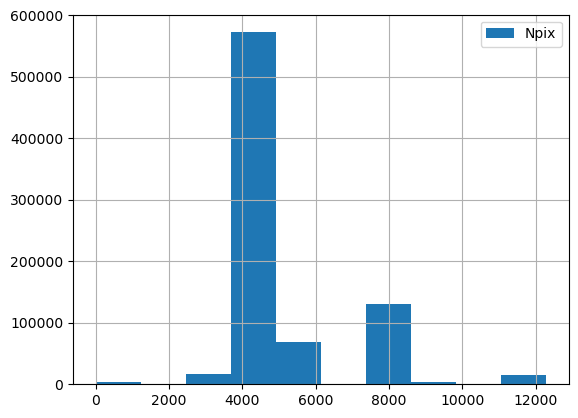

In [22]:
final.Npix.hist(label="Npix")
plt.legend()

In [23]:
pixNpix = np.unique(final.Npix).tolist()

# HATS & LSDB use ***NESTED*** scheme!!!

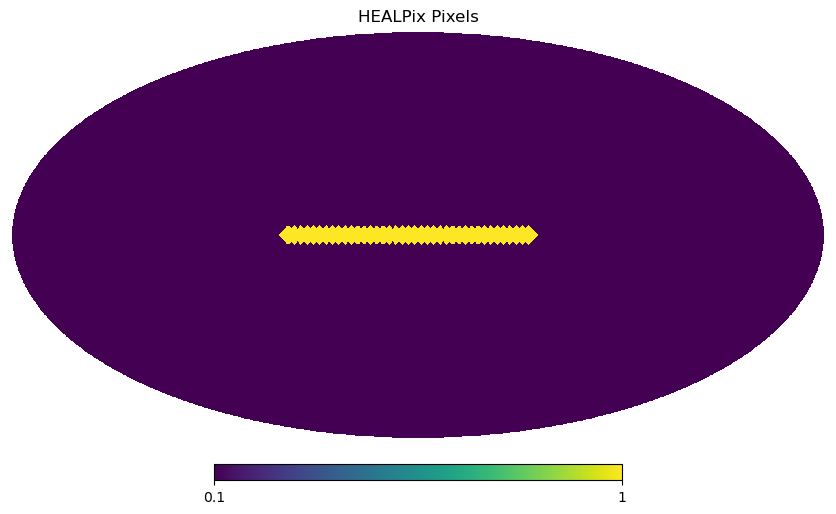

In [27]:
# Set the nside (resolution level, for example nside = 32)
nside = 32

# Calculate the total number of pixels for the given nside
npixels = hp.nside2npix(nside)

# Create a blank map (initialized with zeros)
map_data = np.zeros(npixels)  # Correct size based on nside

# Set the pixels in the list to some value (for example, 1.0)
map_data[pixNpix] = 1.0

# Plot the map in Mollweide projection using healpy's mollview
hp.mollview(map_data, title="HEALPix Pixels", cmap="viridis", xsize=2000, min=0.1, nest=True)


# Show the plot
plt.show()